# 用于AI的高级随机技术——模拟试验

<!-- Advanced Randomness Techniques for Game AI -->

![](https://img.shields.io/badge/作者-jskyzero-brightgreen.svg?style=flat)
![](https://img.shields.io/badge/日期-2021/09/07-brightgreen.svg?style=flat)



一些绘图与模拟，Powered By Python, Conda, Jypyter, Matplotlib...

In [1]:
import numpy as np # for multidimensional array object
import matplotlib.pyplot as plt # for visualizations
from scipy import stats # for efficient numerical routines
import random # for random
from collections import Counter

random.seed(0)

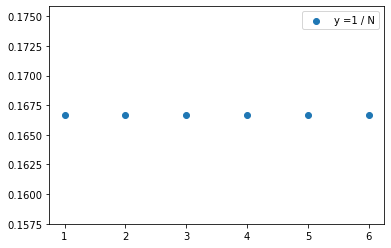

In [2]:
# PDF：离散均等概率

xvals = np.arange(1, 7, 1)
yvals = np.vectorize(lambda x : 1/6)(xvals)


plt.scatter(xvals, yvals, label="y =1 / N")
plt.legend() # 设置label位置

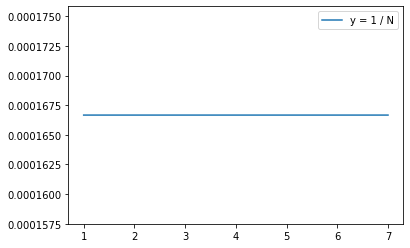

In [3]:
# PDF：连续均等概率

xvals = np.arange(1, 7, 0.001)
yvals = np.vectorize(lambda x : 1/len(xvals))(xvals)

plt.plot(xvals, yvals, label="y = 1 / N")
plt.legend()

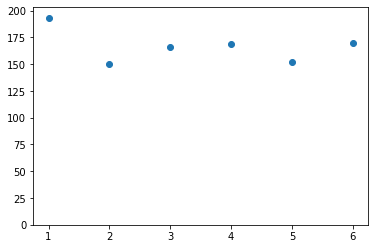

In [4]:
# 模拟，1000次随机1-6的分布
xvals = np.arange(0, 1000, 1)
yfunction = lambda x : random.randint(1,6)
yvals = np.vectorize(yfunction)(xvals)

w = Counter(yvals)
plt.ylim([0, max(w.values()) + 10])
plt.scatter(w.keys(), w.values())

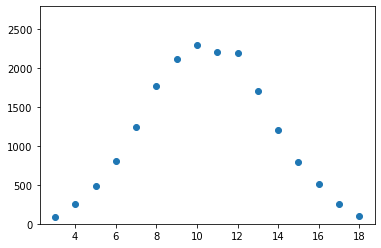

In [5]:
# 模拟，1000*6*3次“随机3次1-6的和”分布
xvals = np.arange(0, 1000*6*3, 1)
yfunction1 = lambda x : random.randint(1,6)
yfunction2 = lambda x : sum(map(yfunction1, range(0,3)))

yvals = np.vectorize(yfunction2)(xvals)
w = Counter(yvals)

plt.ylim([0, max(w.values()) + 500])
plt.scatter(w.keys(), w.values())

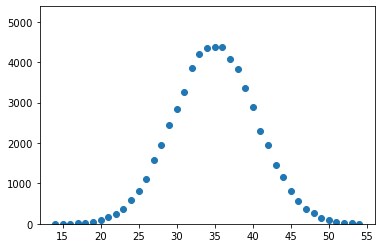

In [6]:
# 模拟，1000*6*10次“随机10次1-6的和”分布
xvals = np.arange(0, 1000*6*10, 1)
yfunction1 = lambda x : random.randint(1,6)
yfunction2 = lambda x : sum(map(yfunction1, range(0,10)))


yvals = np.vectorize(yfunction2)(xvals)
w = Counter(yvals)

plt.ylim([0, max(w.values()) + 1000])
plt.scatter(w.keys(), w.values())

## 若干参考

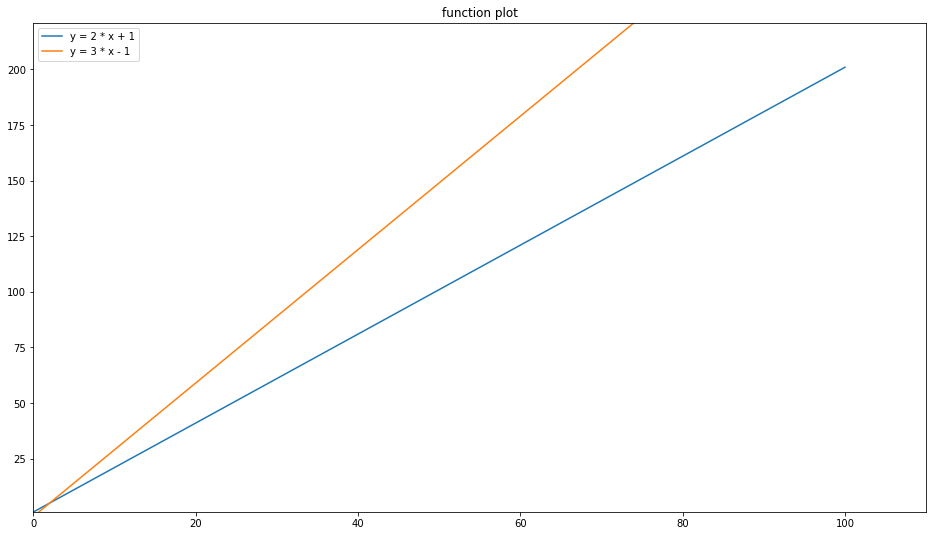

In [7]:
# 画图

xvals = np.arange(0, 100, 0.01)
yvals = np.vectorize(lambda x : 2 * x + 1)(xvals)
yvals2 = np.vectorize(lambda x : 3 * x - 1)(xvals)
# 调整比例
plt.figure(figsize=(16,9))
# 调整坐标轴 
plt.xlim(xvals.min()*1.1, xvals.max()*1.1)
plt.ylim(yvals.min()*1.1, yvals.max()*1.1)
plt.title("function plot")
# 画图
plt.plot(xvals, yvals, label="y = 2 * x + 1")
plt.plot(xvals, yvals2, label="y = 3 * x - 1")
# 设置label位置
plt.legend(loc="upper left")

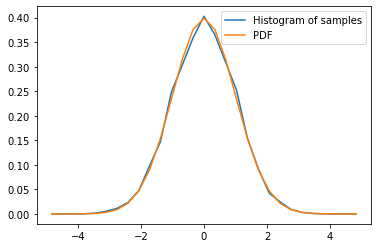

In [8]:
# 正态分布

# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=10000)

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object

pdf = stats.norm.pdf(bin_centers)


plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()